In [1]:
#Importing needed libraries

import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Storing the csv file into the df variable

df=pd.read_csv('customer_retention.csv')
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [3]:
#Printing its first five columns of the dataframe

df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [4]:
#Using set option to include all the columns in the dataframe

pd.set_option('display.max_columns',None)

In [5]:
#Getting the information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [6]:
#Reviewing the dataset features

df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

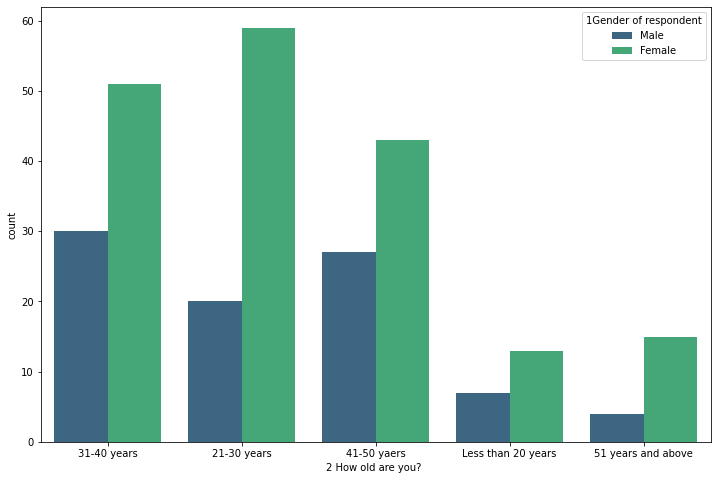

In [7]:
#As we can see in the group of 21-30 years we have the highest range
#Also we can see that Females are of highest numbers 

plt.figure(figsize=(12,8))
sns.countplot(x=df['2 How old are you? '],hue=df['1Gender of respondent'],palette='viridis')
plt.show()

In [8]:
#Checking where are the participants from
#Lets plot a graph to get a better understanding

print(df['3 Which city do you shop online from?'].value_counts())

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64


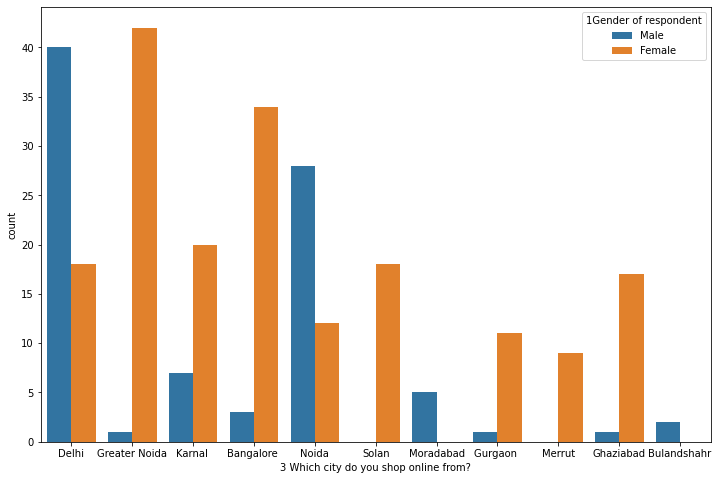

In [9]:
#Here we can determine the female are in more numbers & the highest are from Greater Noida
#Also for males Delhi has the highest number of male.

plt.figure(figsize=(12,8))
sns.countplot(x=df['3 Which city do you shop online from?'],hue=df['1Gender of respondent'])
plt.show()

In [10]:
#Checking wheater there are any relation b/w how long the people's are purchasing online & purachsed in last one year

df['5 Since How Long You are Shopping Online ?'].value_counts()

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

In [11]:
#Printing how many times the individuals has purchased products online in past one year

df['6 How many times you have made an online purchase in the past 1 year?'].value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

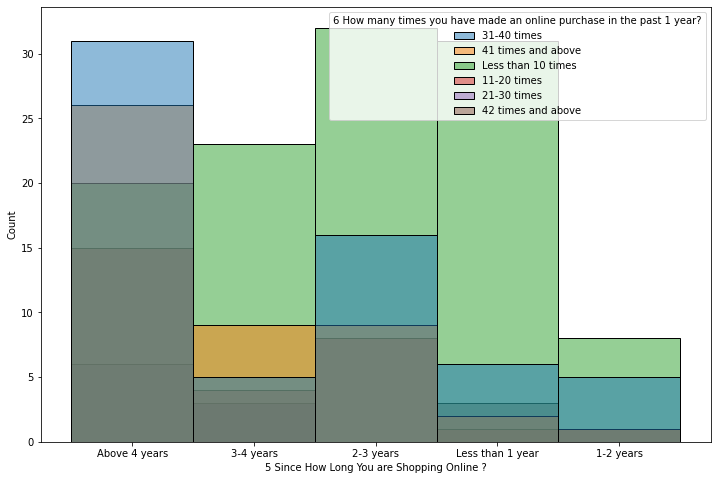

In [12]:
#As we can see as the no. of years increse the lenght of shopping experience also increasing stats that they have a positive relationship
#In 1-2 years of shopping online the customers have ordered very low i.e. below 10 times
#And the customers who are purchasing from 4 years & above they have ordered more than 42 times

plt.figure(figsize=(12,8))
sns.histplot(data=df,x=df['5 Since How Long You are Shopping Online ?'],hue='6 How many times you have made an online purchase in the past 1 year?')
plt.show()

In [13]:
#We will now check that what factors are there that attracting customers for more than 4 years
#And why an individual starts purachsing online
#Lets plot a graph to get better understanding

check=pd.crosstab(index=df['5 Since How Long You are Shopping Online ?'],columns=df['30 Online shopping gives monetary benefit and discounts'])
ck=pd.DataFrame(check)
ck

30 Online shopping gives monetary benefit and discounts,Agree (4),Dis-agree (2),Strongly agree (5),Strongly disagree (1),indifferent (3)
5 Since How Long You are Shopping Online ?,,,,,
1-2 years,2,0,9,0,5
2-3 years,18,1,34,3,9
3-4 years,16,2,20,6,3
Above 4 years,24,8,26,8,32
Less than 1 year,25,0,16,1,1


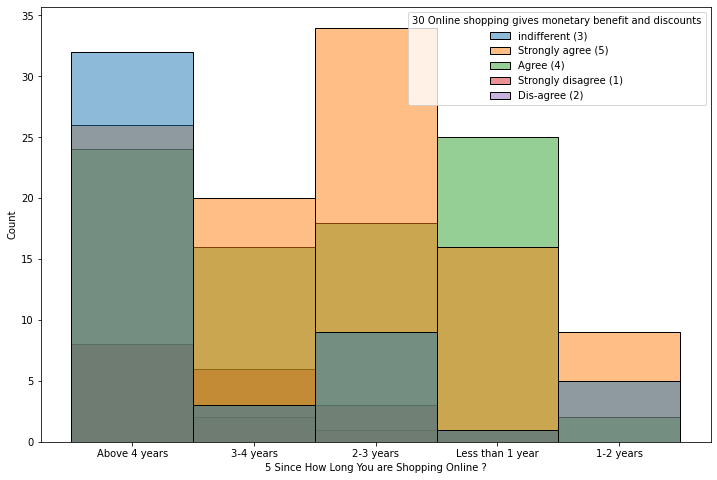

In [14]:
#In 2-3 years & 3-4 years strongly agree that online purchase is more benefitial & gives exiting offers
#In 1-2 years they are not saying that they do not agree, they do agree but at smaller rate compare to 2-3 years

plt.figure(figsize=(12,8))
sns.histplot(data=df,x=df['5 Since How Long You are Shopping Online ?'],hue=df['30 Online shopping gives monetary benefit and discounts'])
plt.show()

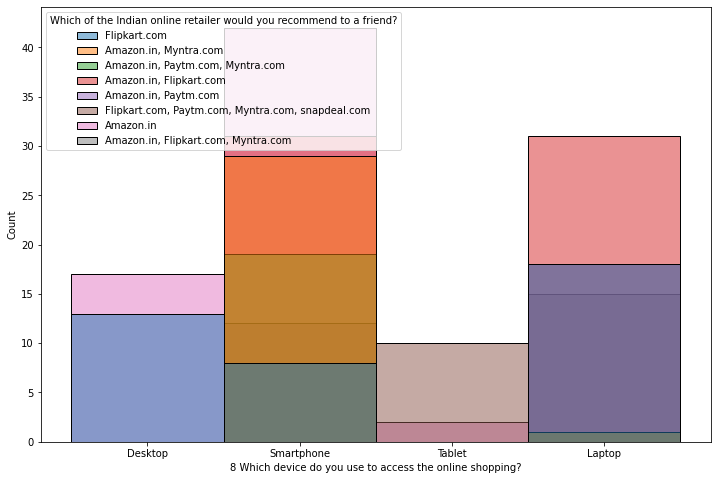

In [15]:
#Now lets check what different devices & websites our customers has used to purchase online
#Desktop & Tablet people's have only purchased from amazon & flipkart
#Smartphone has wide variety there are so many different websites are used to made purchase online
#Laptop class has also purchased from different sites that are:-
                                                #1 Amazon.in,Flipkart.com
                                                #2 Amazon.in,Paytm.com
                                                #3 Amazon.in,Flipkart.com,Myntra.com
            
            

plt.figure(figsize=(12,8))
sns.histplot(data=df,x=df['8 Which device do you use to access the online shopping?'],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
plt.show()

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: int64


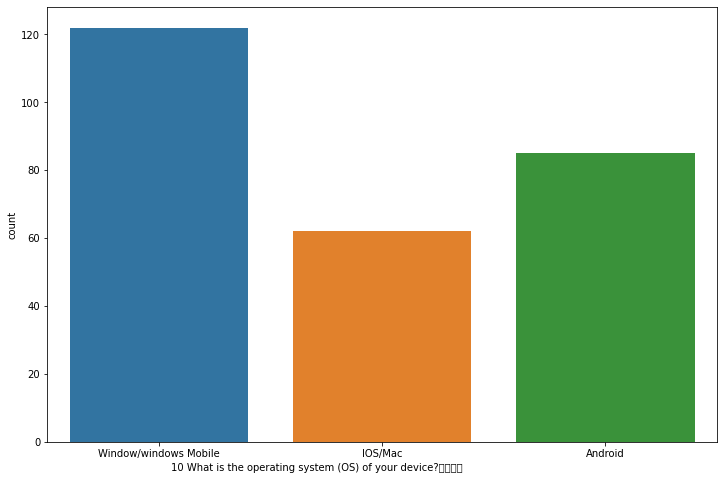

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: int64


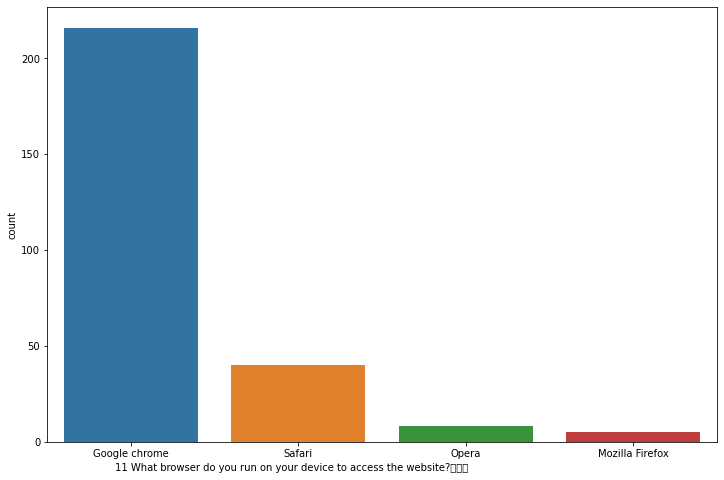

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   , dtype: int64


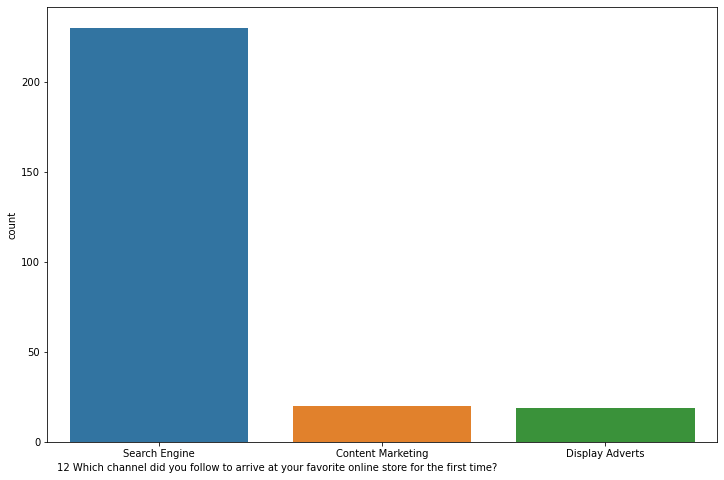

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: 13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   , dtype: int64


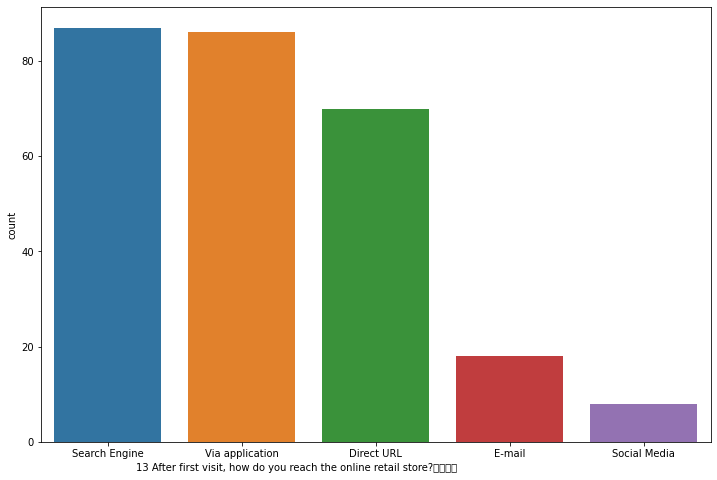

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , dtype: int64


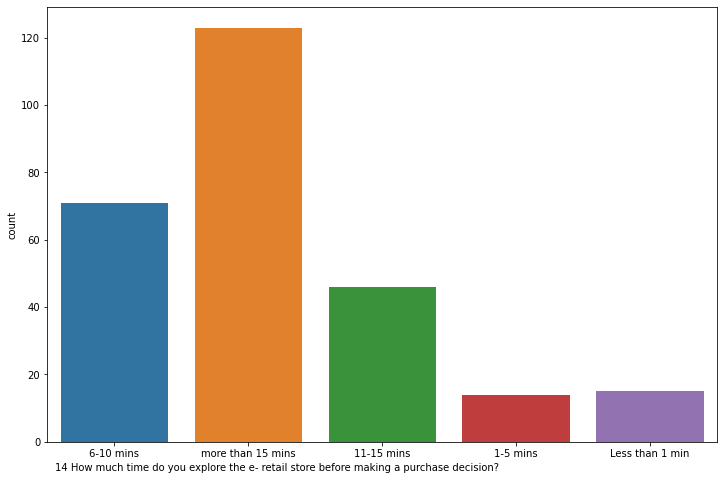

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: 15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               , dtype: int64


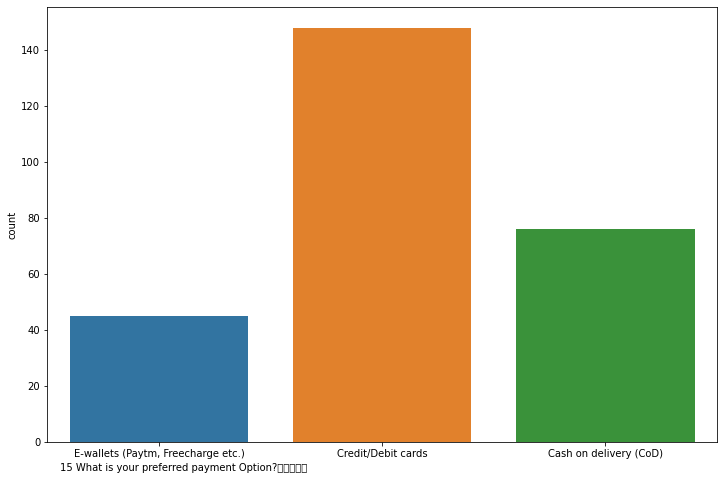

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: 16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   , dtype: int64


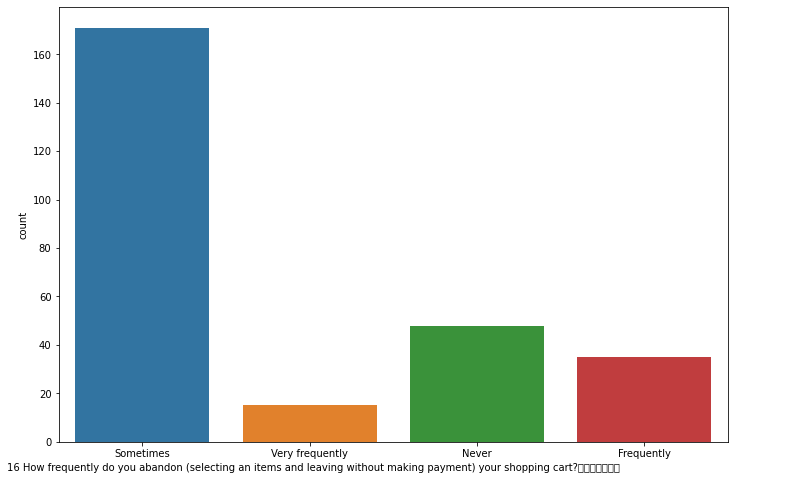

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64


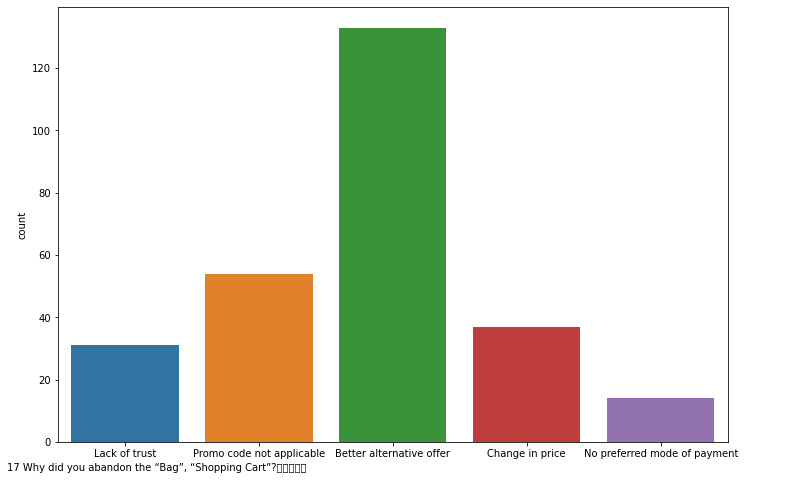

In [16]:
#Now we can check what different kinds of relations are there b/w the columns

for col in df.iloc[:,9:17]:
    print(df[col].value_counts())
    plt.figure(figsize=(12,8))
    sns.countplot(x=df[col])
    plt.show()

In [17]:
#Insights from the above graph
#Windows & Windows mobile is used the most after that Android & lastly IOS/mac is used
#Google chrome is the most used browser 
#Search engine is used highly
#Search engine is slightly high to via application after that direct URL is used then E-mail & lastly social media is used
#More than 15 mins is mostly spended time via making an online purchase after that 6-10 mins then 11-15 then 1-5 & last less than 1min
#Credit/Debit cards are the most used mode of payment after that Cash on delivery & lastly E-wallets
#Sometimes only the customers have abandon the selected item after that never after than Frequently & lastly very Frequently
#For better alternative offer the customers have abandon the bag after that promo code not aplicable after that change in price after that lack of trust & lastly No preffered mode of payment available


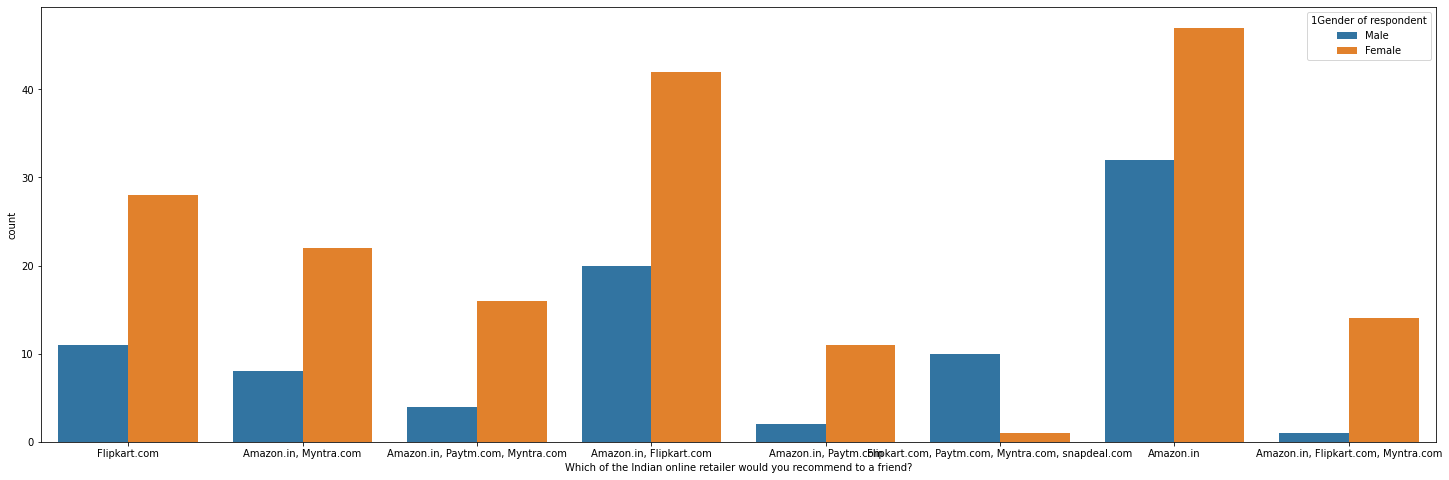

In [18]:
#Lets now see which Indian online retailer would you recommend to a friend
#We can see that females & males both are highly recommending amazon.in

plt.figure(figsize=(25,8))
sns.countplot(data=df,x=df['Which of the Indian online retailer would you recommend to a friend?'],hue=df['1Gender of respondent'])
plt.show()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , dtype: int64


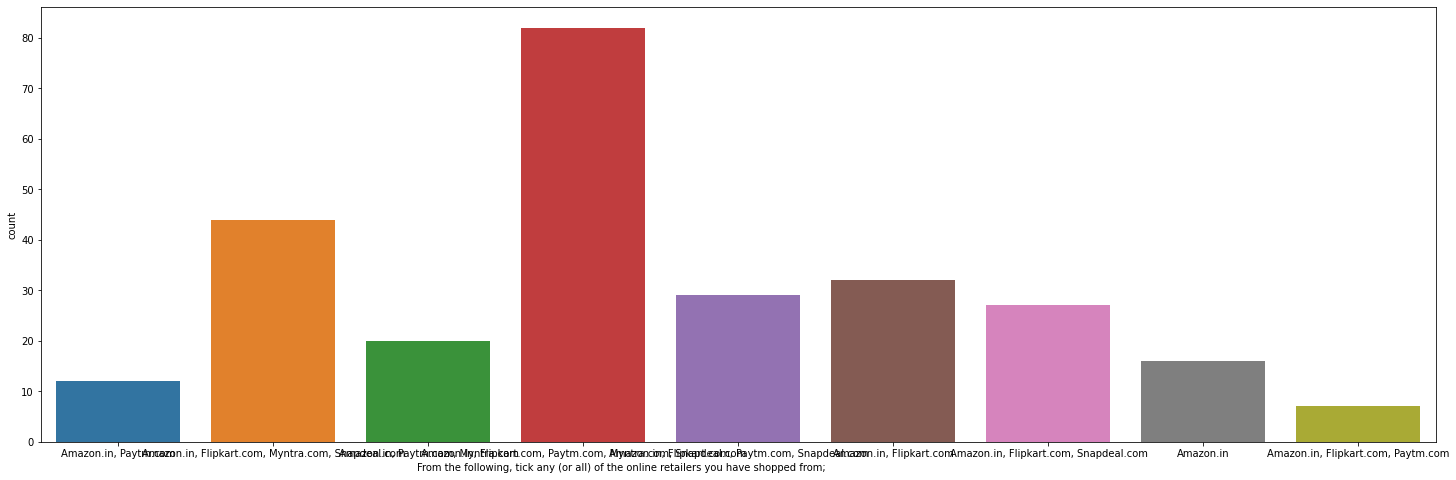

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64


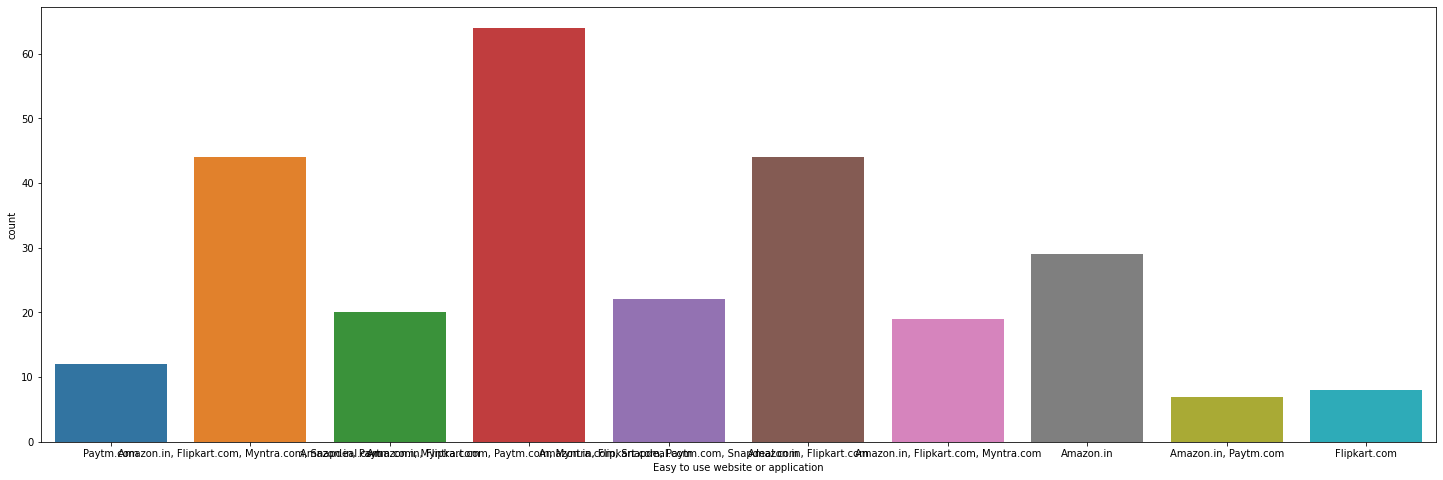

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Myntra.com                                                      15
Flipkart.com, Myntra.com                                        15
Amazon.in, Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing web-page layout, dtype: int64


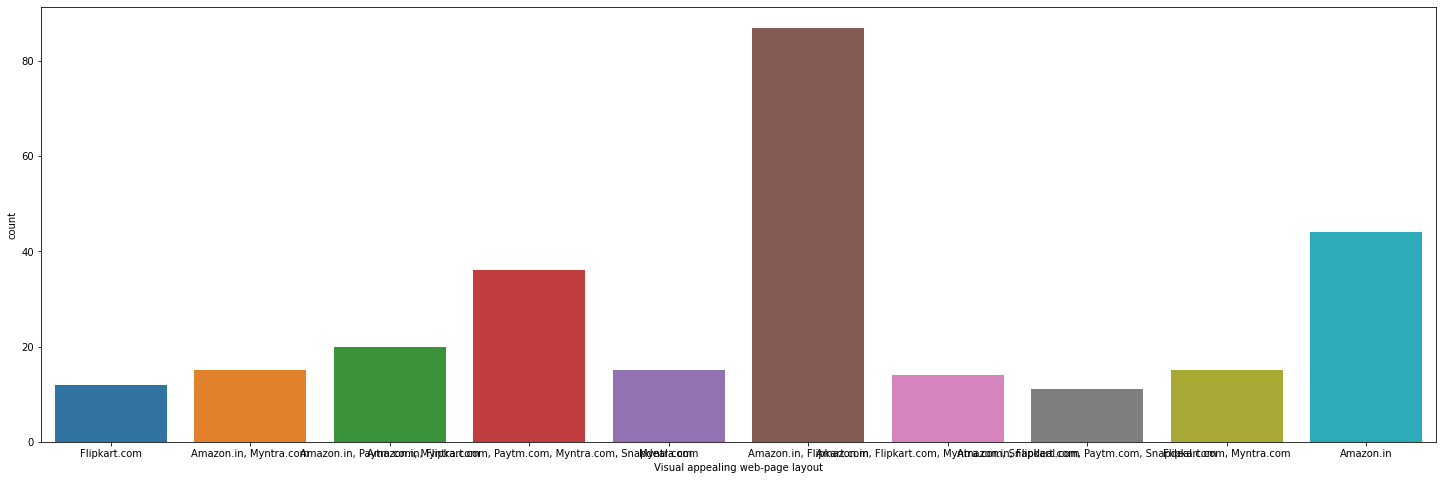

Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Myntra.com                                            15
Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64


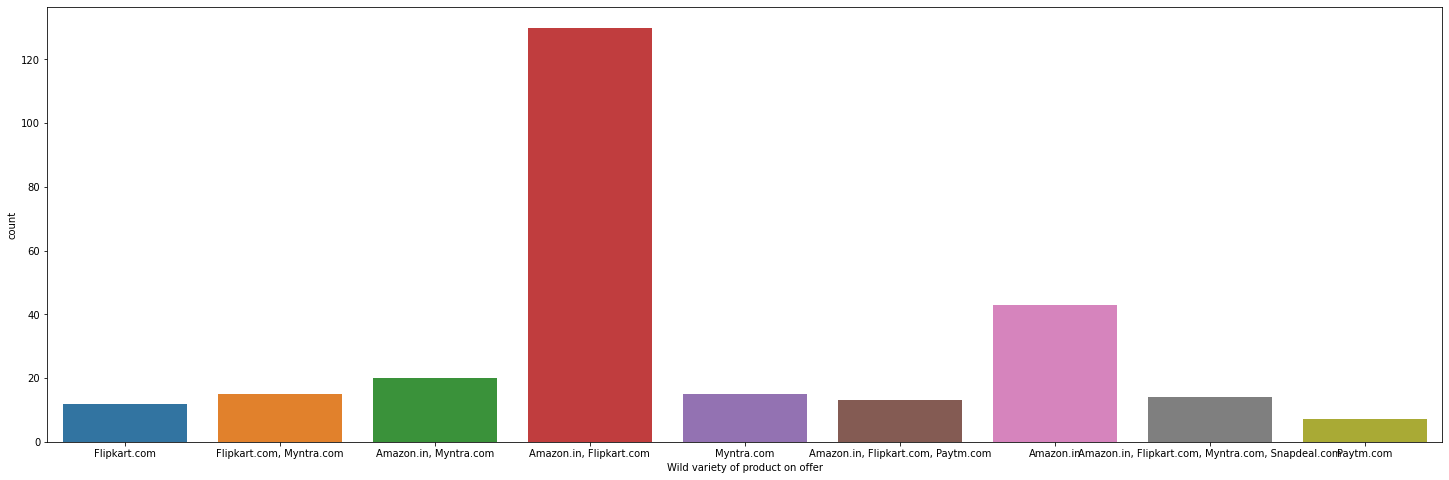

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete, relevant description information of products, dtype: int64


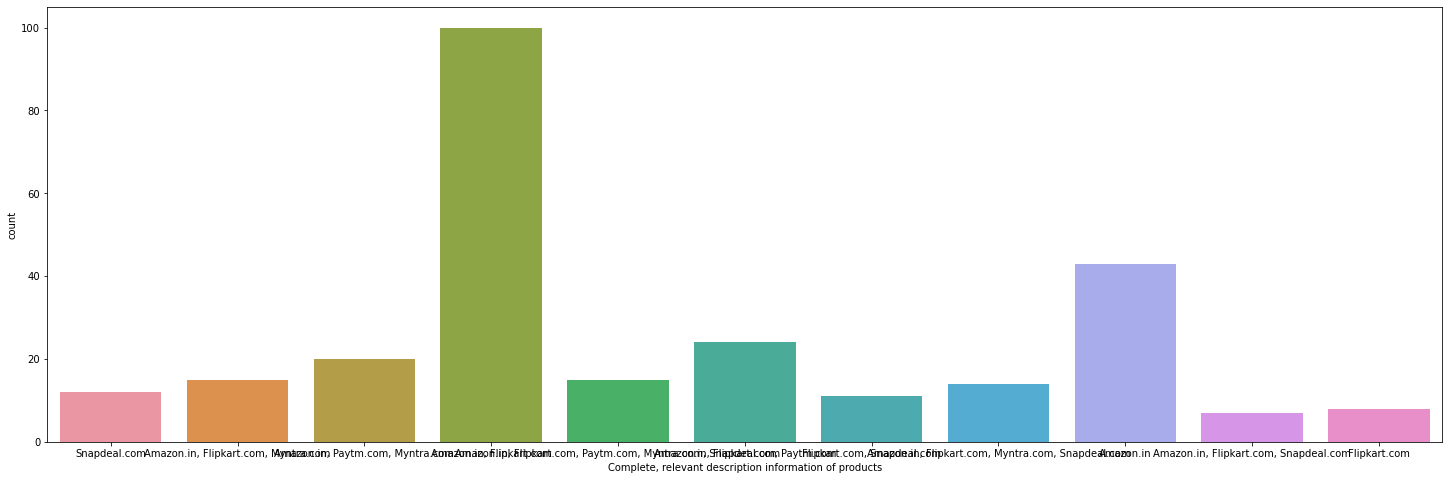

Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast loading website speed of website and application, dtype: int64


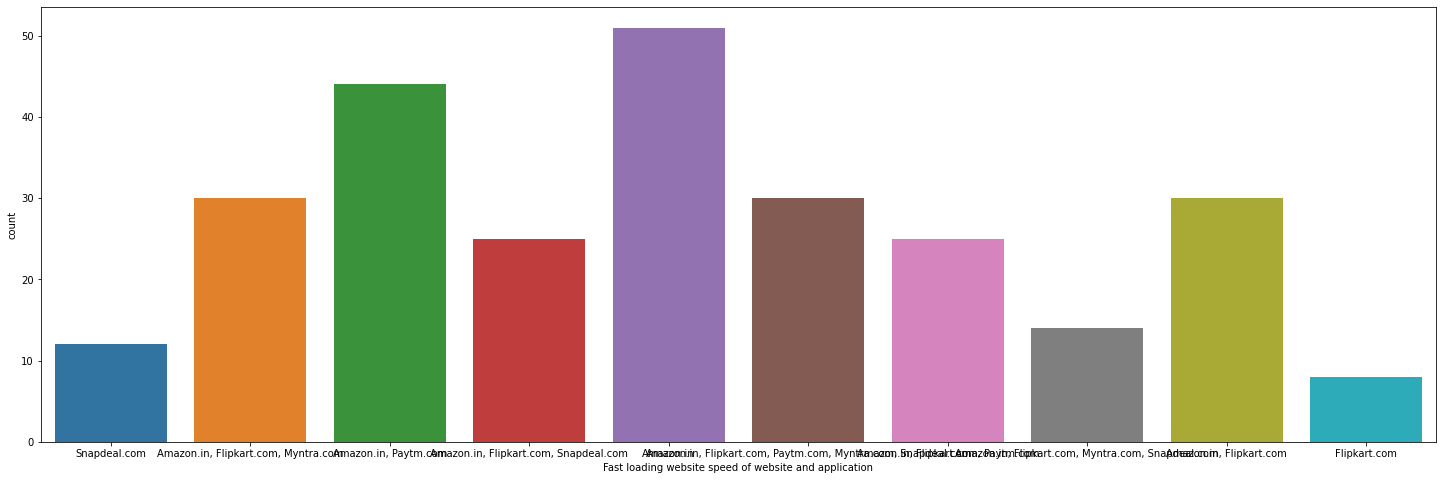

Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Myntra.com                                           15
Flipkart.com                                         15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliability of the website or application, dtype: int64


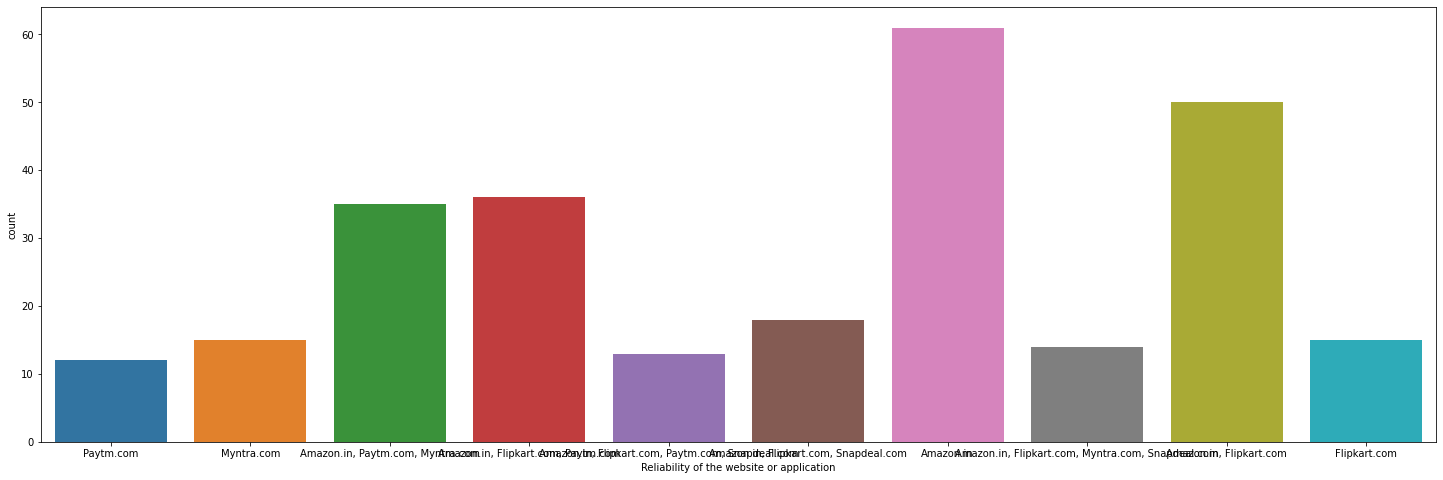

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Flipkart.com                                                 15
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64


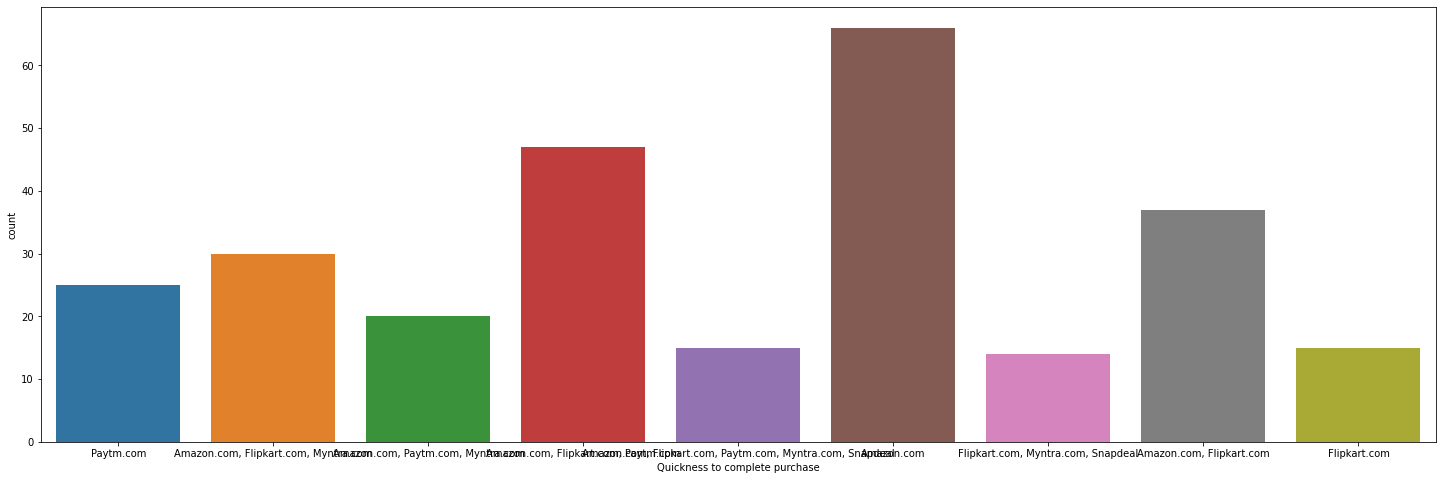

Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Availability of several payment options, dtype: int64


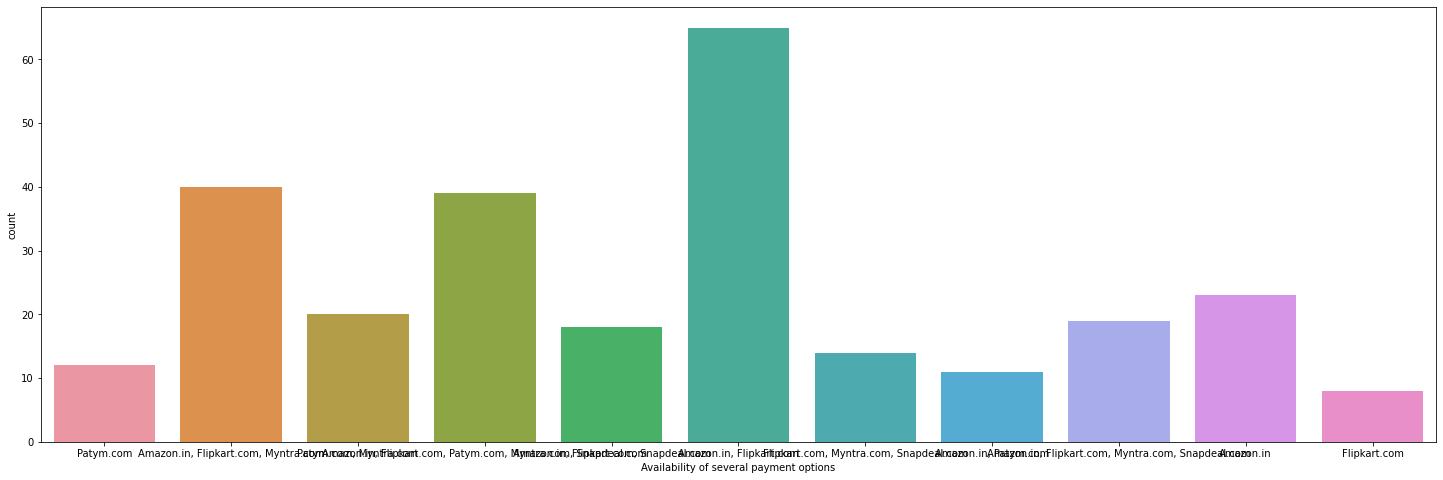

Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy order delivery , dtype: int64


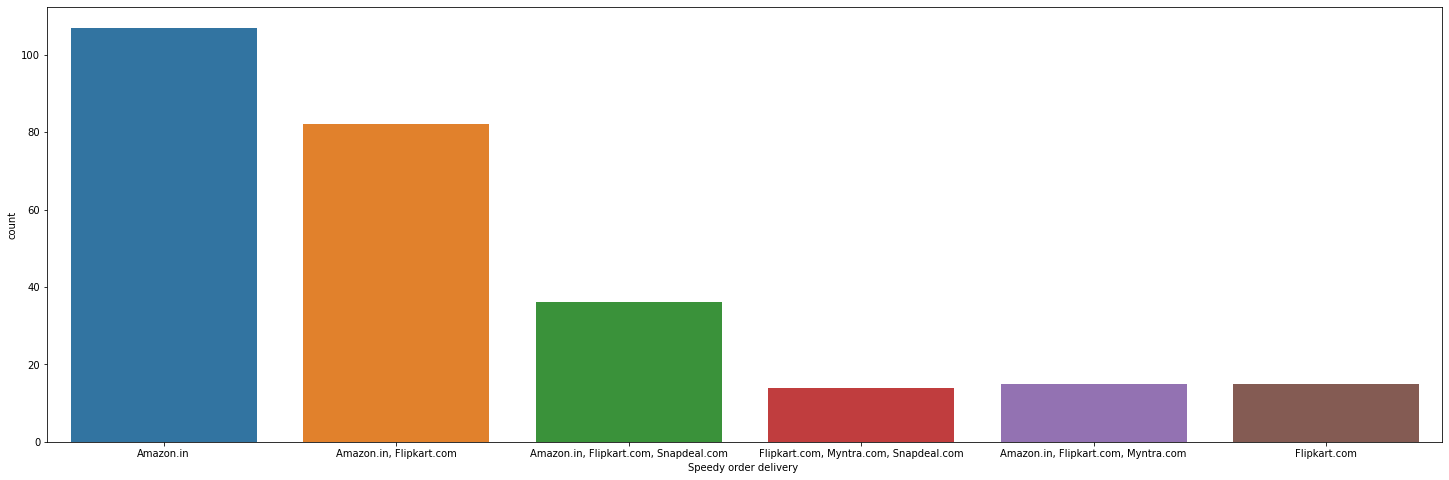

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Myntra.com                                                      15
Flipkart.com                                                    15
Amazon.in, Paytm.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy of customers’ information, dtype: int64


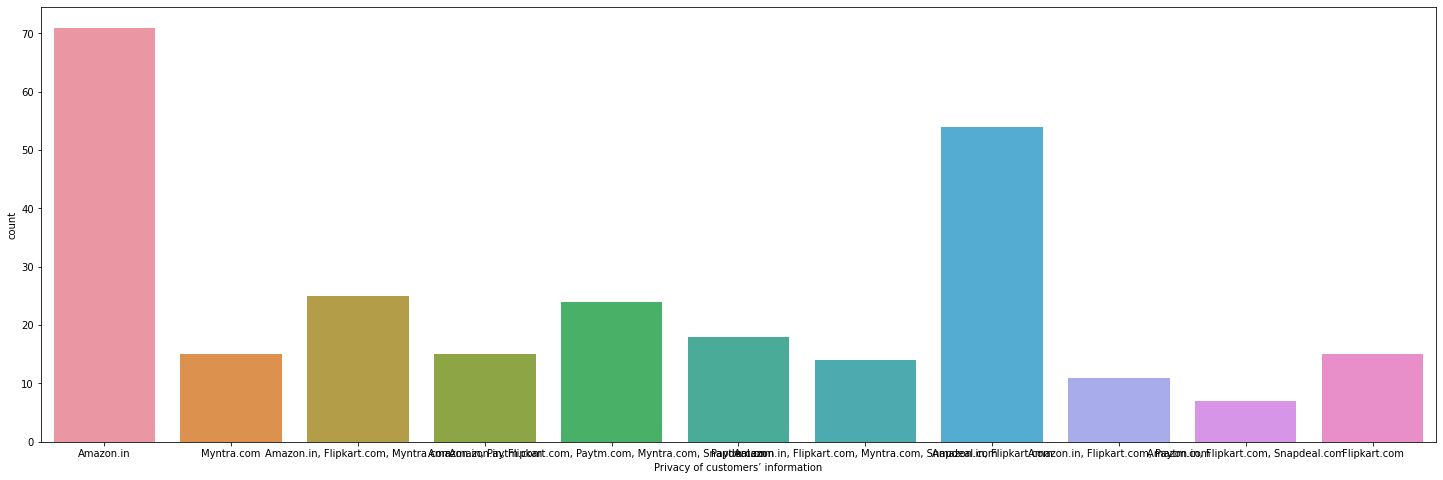

Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security of customer financial information, dtype: int64


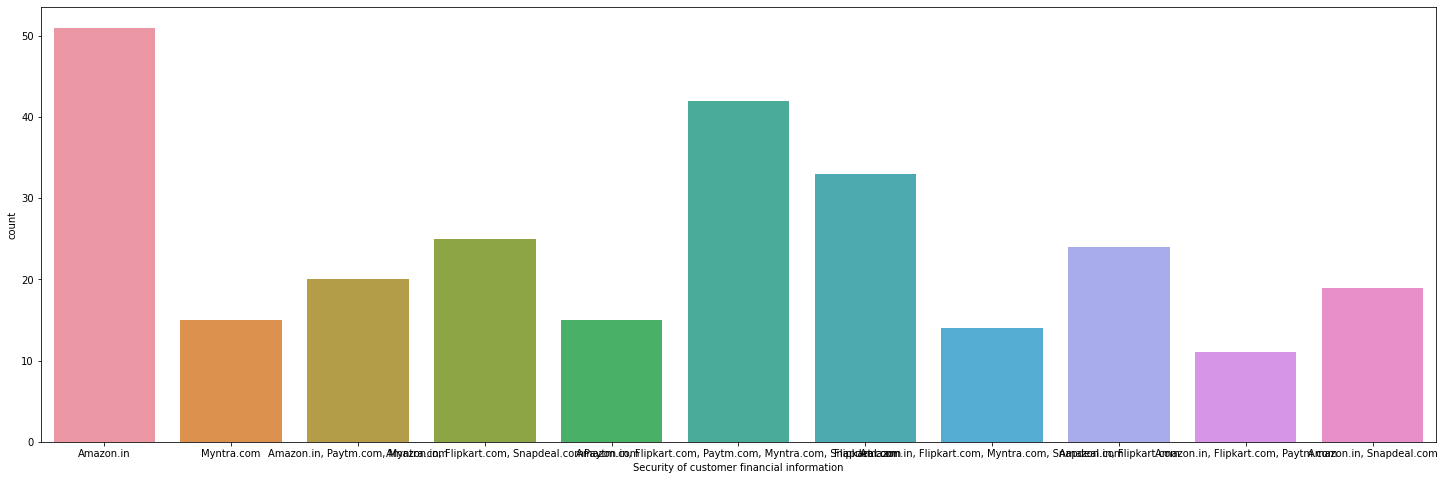

Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthiness, dtype: int64


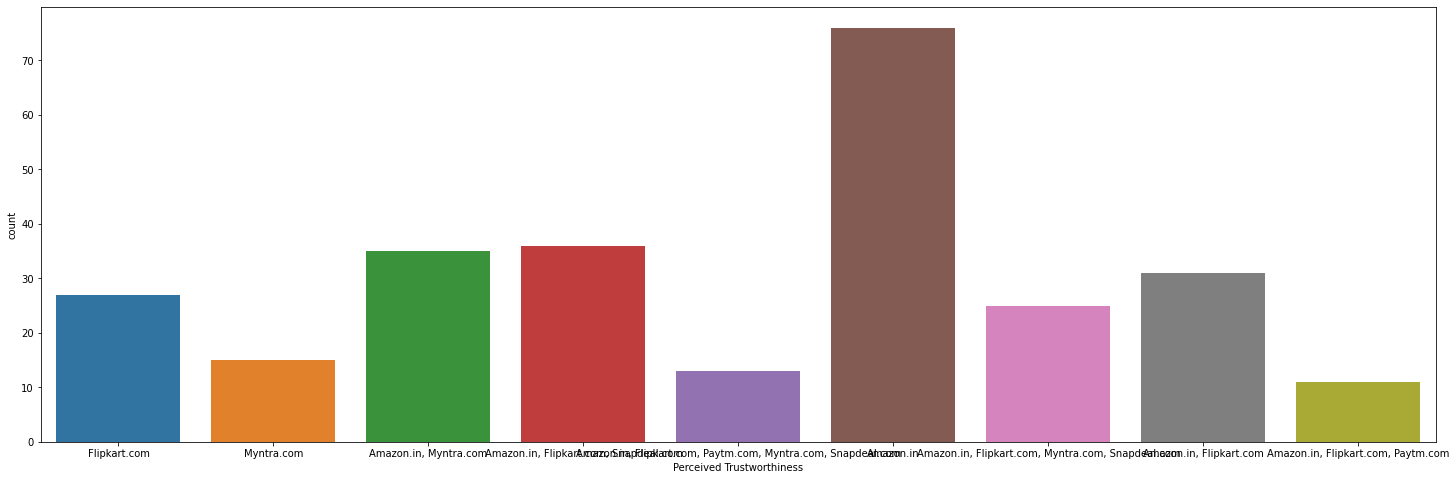

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Presence of online assistance through multi-channel, dtype: int64


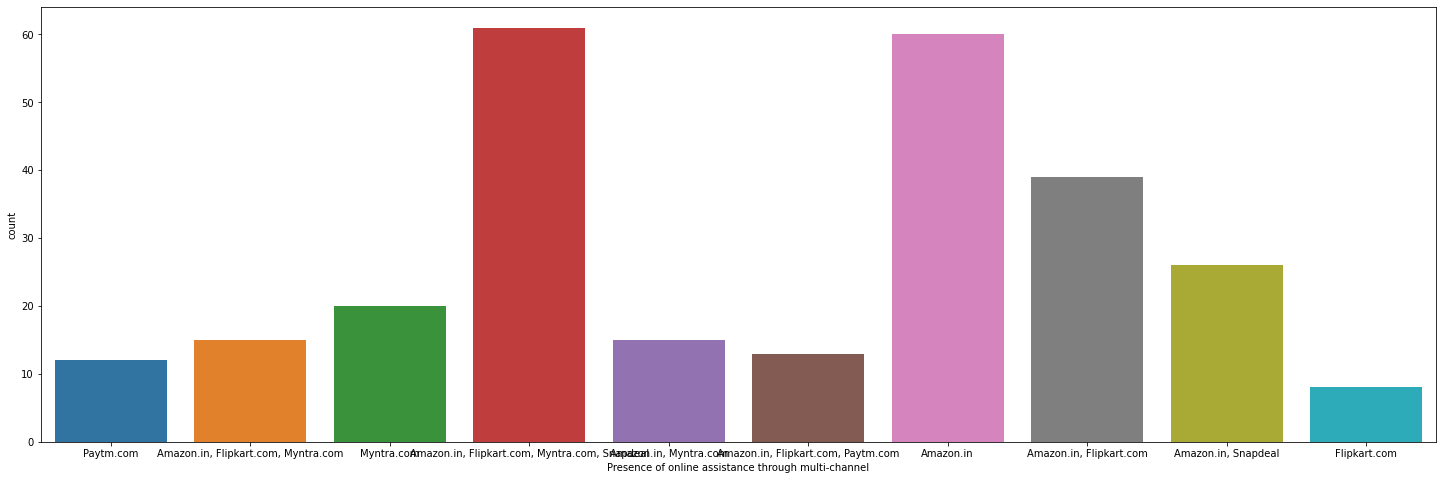

Amazon.in                                57
Paytm.com                                38
Amazon.in, Flipkart.com                  38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in (promotion, sales period), dtype: int64


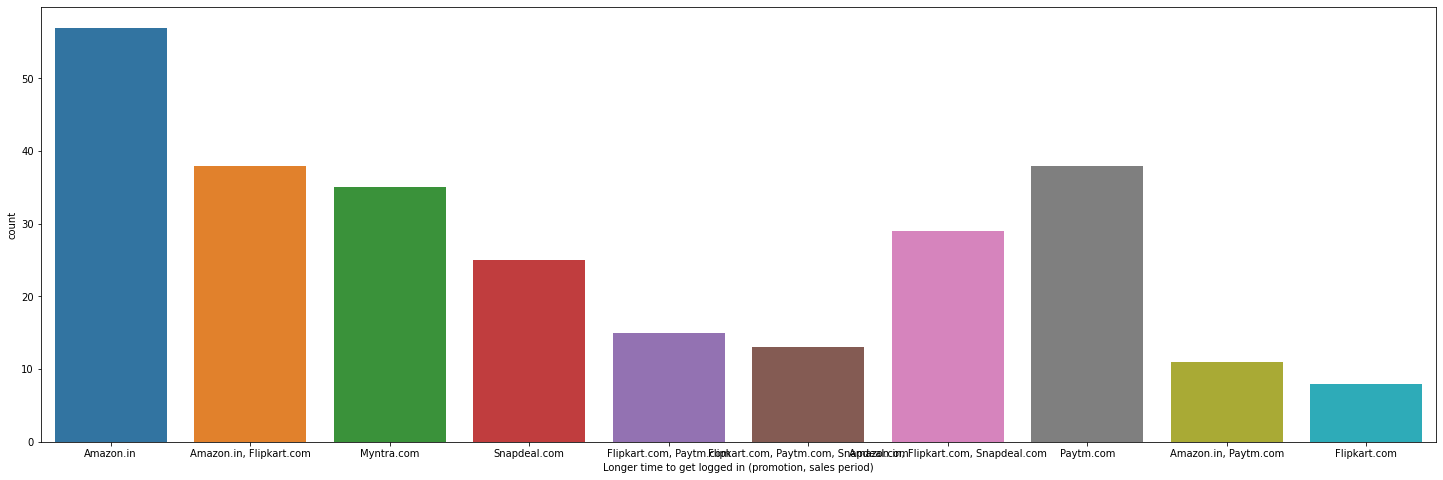

Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Flipkart.com                           15
Paytm.com                              15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64


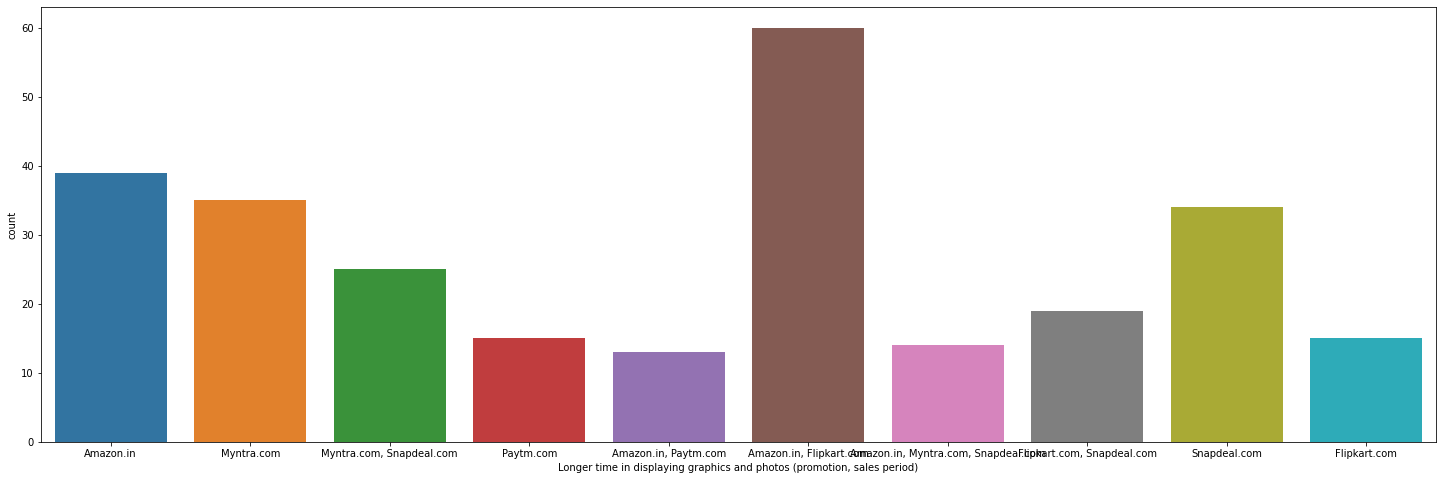

Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Flipkart.com               38
Amazon.in                  38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration of price (promotion, sales period), dtype: int64


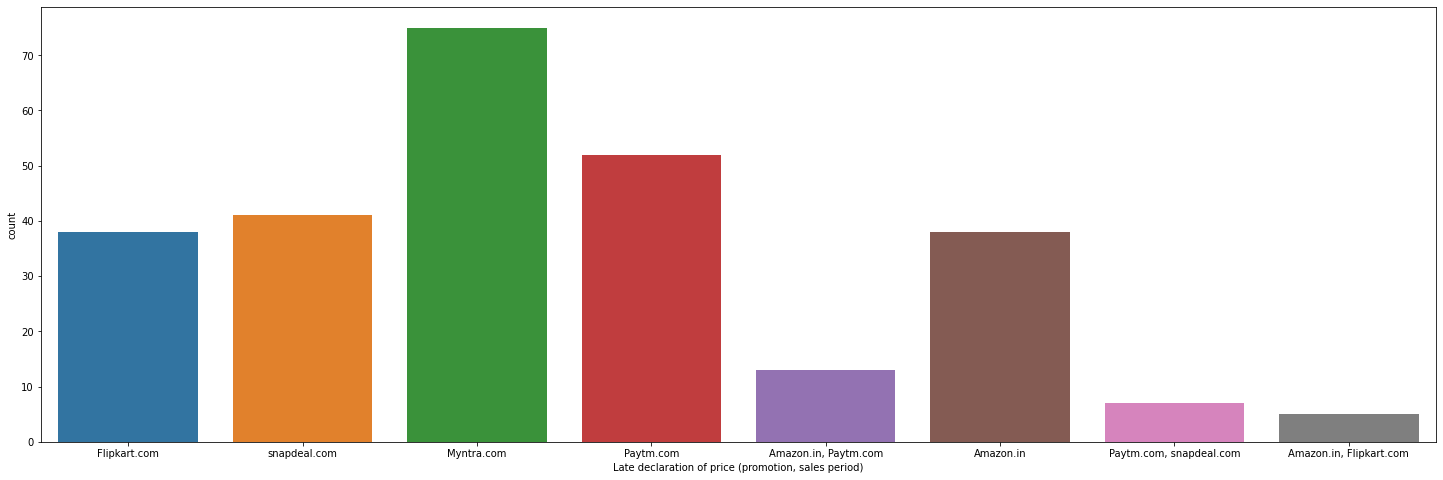

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer page loading time (promotion, sales period), dtype: int64


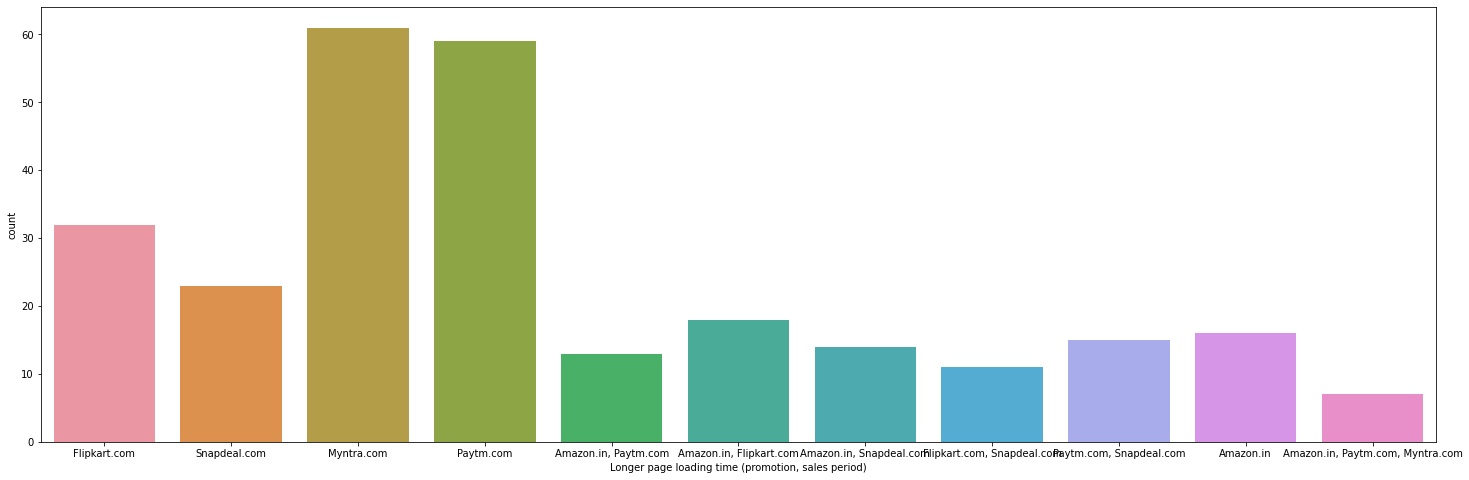

Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited mode of payment on most products (promotion, sales period), dtype: int64


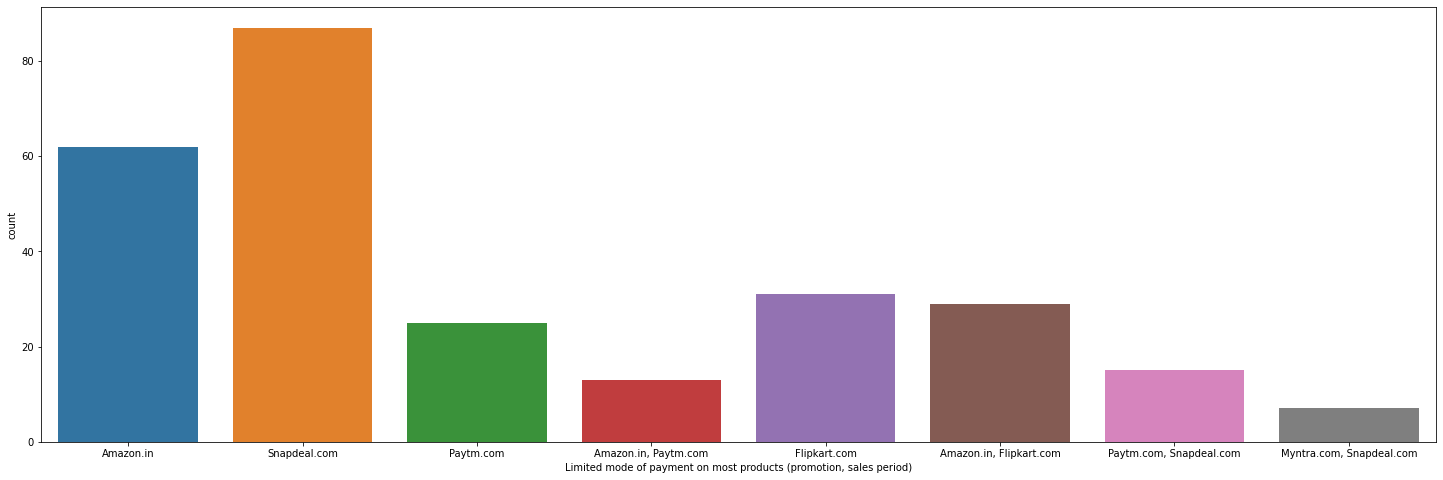

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Myntra.com                 26
Paytm.com, Snapdeal.com    26
Name: Longer delivery period, dtype: int64


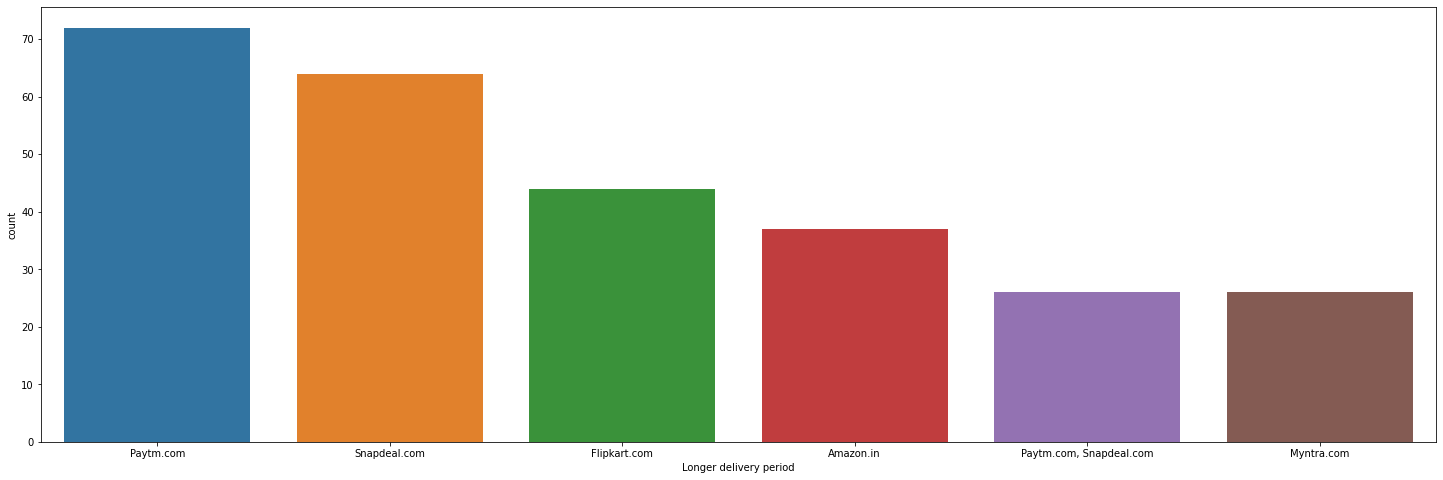

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64


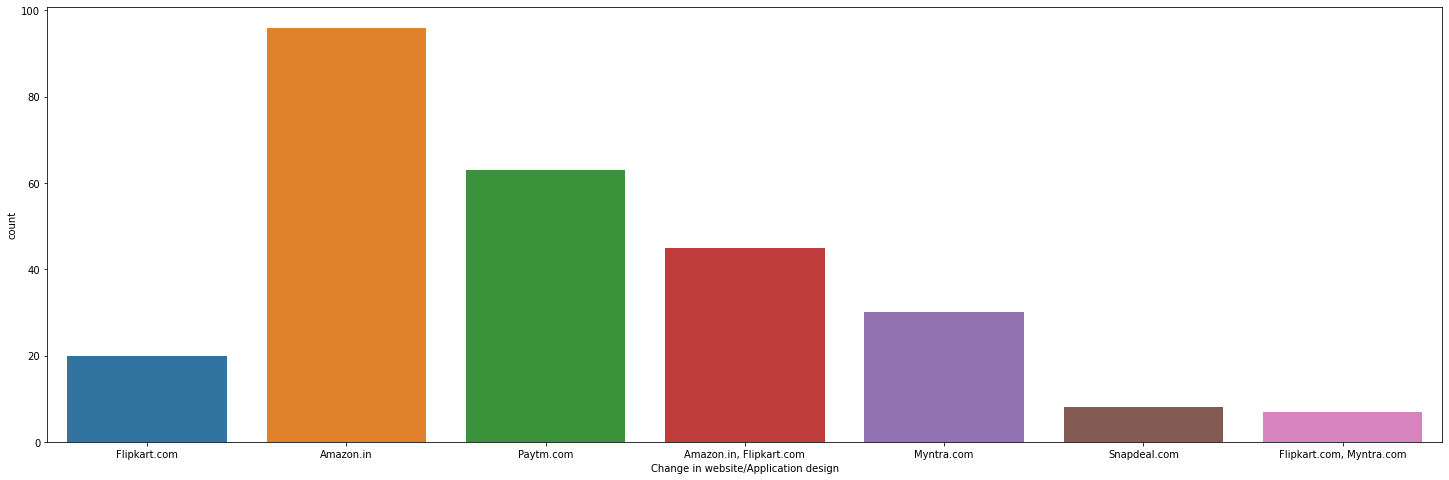

Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Frequent disruption when moving from one page to another, dtype: int64


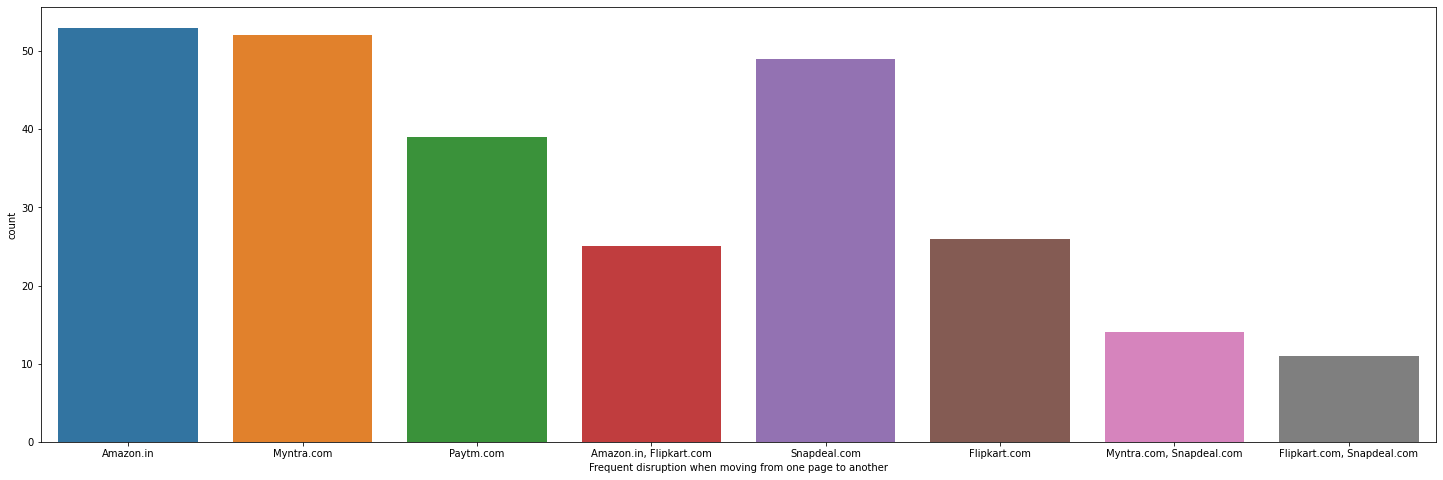

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64


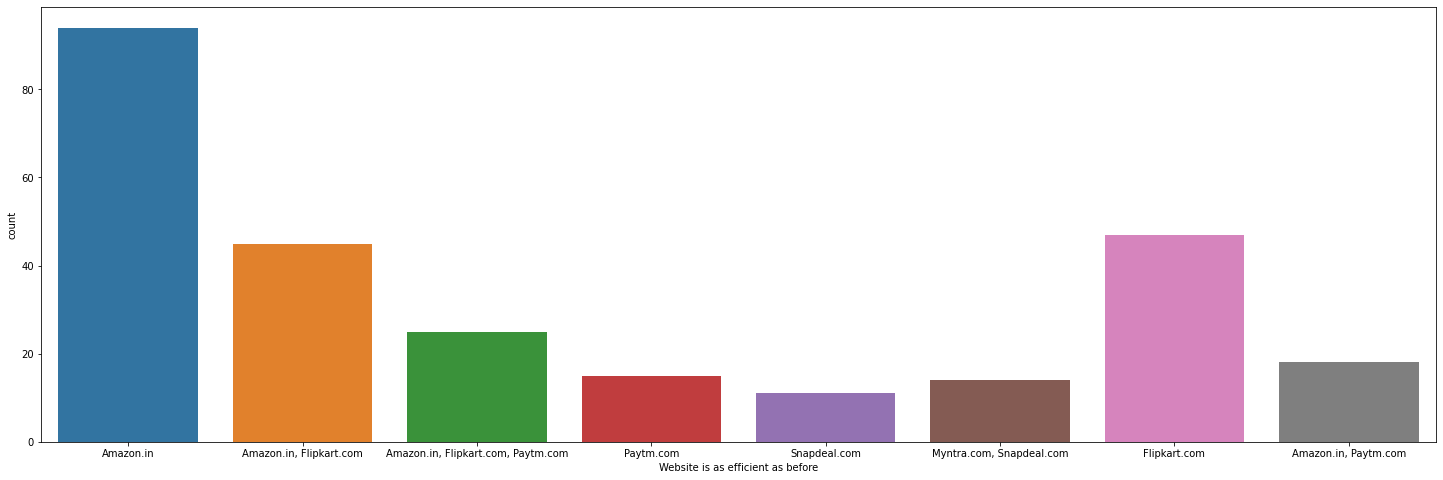

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


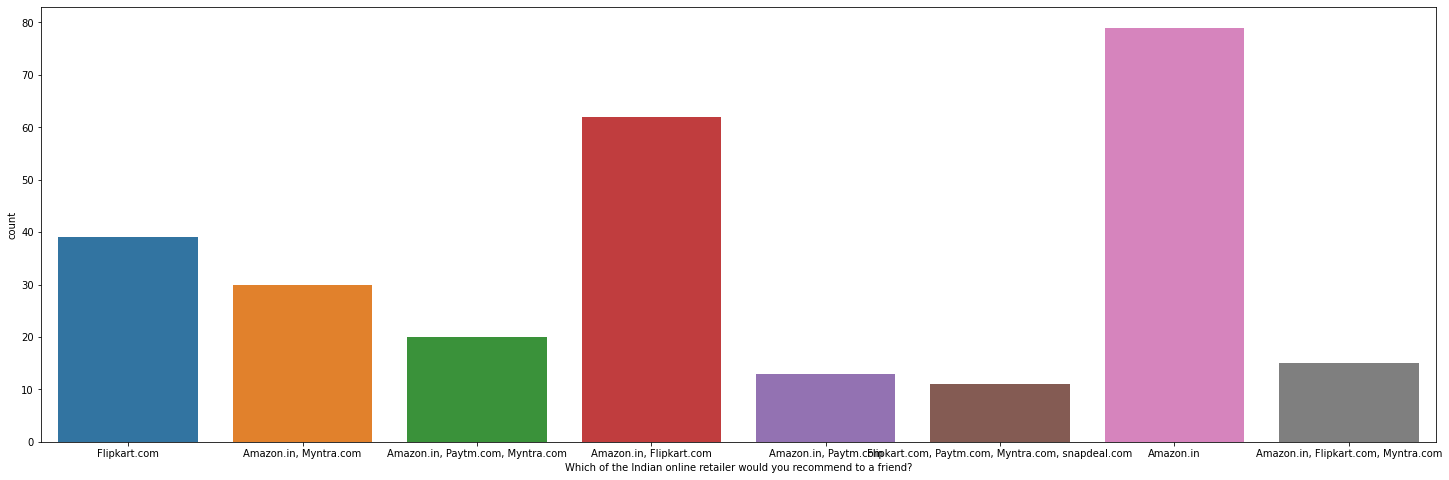

In [19]:
for col in df.iloc[:,47:]:
    print(df[col].value_counts())
    plt.figure(figsize=(25,8))
    sns.countplot(df[col])
    plt.show()

In [20]:
#Analysis of the above graph
#Most of the buyers have purchased from Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com and everyone has shopped from Amazon.in. The next majority with the categories would be flipkart.
#Again, almost every website is easy to use according to buyers, when it comes to visually most appealing websites Amazon.in and Flipkart.com tops the list
#When it comes to wide variety of products on offer, Complete relevant description information, Fast loading website/application, Reliablility, Interface, Availability of payment options,faster delivery, customer privacy, security, Trustworthiness, Customer support through multiple channels, time spent on a website, Website and application design updates and websites recommended to a friend most people voted for Amazon.in and Flipkart.com
#However, when we see analyse factors such as Late declaration of price and Longer page loading time Myntra and paytm tops the list and this promoting a bad buyer experience.
#Further, when it comes to Limited mode of payment on most products Snapdeal tops the list followed by Amazon. Here is the only place Amazon needs to improve as we can see from the customer preferences, more options on payment mode is required.
#When it comes to longer delivery period, Paytm and Snapdeal tops the list which is not in line with the customer expectations.
#When it comes to frequent disruptions, Amazon, myntra and Snapdeal tops the list.

# CONCLUSION

In [21]:
#Using chi square contingency we can derive our conclusion
#Importing chi2 contingency from scipy.stats

from scipy.stats import chi2_contingency

In [22]:
#Putting the 22 column into the row & other columns for determining their relationship.
#Assuming that this is a null hypothesis[H0]

cross=pd.crosstab(index=df['22 Ease of navigation in website'],columns=df['Which of the Indian online retailer would you recommend to a friend?'])
cross

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
22 Ease of navigation in website,,,,,,,,
Agree (4),40,7,0,15,0,20,12,11
Dis-agree (2),5,0,0,0,0,0,0,0
Strongly agree (5),16,55,15,15,13,0,27,0
Strongly disagree (1),18,0,0,0,0,0,0,0


In [23]:
#Storing all the actual values in original_values & printing it.

original_values=cross.values
print('The real values are:',original_values)

The real values are: [[40  7  0 15  0 20 12 11]
 [ 5  0  0  0  0  0  0  0]
 [16 55 15 15 13  0 27  0]
 [18  0  0  0  0  0  0  0]]


In [24]:
#Checking wheather the pvalue is greater than 0.05 or not
#Here the pvale is greater than the threshold i.e. 0.05 so we will print that it is dependent & we will reject the null hypothesis 

stat, p, dof, expected = chi2_contingency(original_values)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

p value is 4.3875333226283436e-26
Dependent (reject H0)


In [25]:
#Checking diiferent tables with all the columns
#Putting 24 columns into the comparison with the all columns

cross1 = pd.crosstab(index=df['24 User friendly Interface of the website'],columns=df['Which of the Indian online retailer would you recommend to a friend?'])
cross1

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
24 User friendly Interface of the website,,,,,,,,
Agree (4),34,0,0,0,0,0,0,11
Dis-agree (2),0,0,0,0,0,0,12,0
Indifferent (3),5,0,0,0,0,0,0,0
Strongly agree (5),22,62,15,30,13,20,27,0
Strongly disagree (1),18,0,0,0,0,0,0,0


In [26]:
#Storing the actual values & printing it

actual_values = cross1.values
print('The actual values are', actual_values)

The actual values are [[34  0  0  0  0  0  0 11]
 [ 0  0  0  0  0  0 12  0]
 [ 5  0  0  0  0  0  0  0]
 [22 62 15 30 13 20 27  0]
 [18  0  0  0  0  0  0  0]]


In [27]:
#Checking wheather the pvalue is greater than 0.05 or not
#Here the pvale is greater than the threshold i.e. 0.05 so we will print that it is dependent & we will reject the null hypothesis 

stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

p value is 2.325066084016344e-43
Dependent (reject H0)


In [28]:
cross2 = pd.crosstab(index = df['35 Displaying quality Information on the website improves satisfaction of customers'],columns = df['Which of the Indian online retailer would you recommend to a friend?'])
cross2

Which of the Indian online retailer would you recommend to a friend?,Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com",Flipkart.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
35 Displaying quality Information on the website improves satisfaction of customers,,,,,,,,
Agree (4),28,7,0,15,0,0,19,11
Strongly agree (5),32,30,15,15,13,20,8,0
indifferent (3),19,25,0,0,0,0,12,0


In [29]:
#Storing the actual values & printing it

actual_values = cross2.values
print('The actual values are', actual_values)

The actual values are [[28  7  0 15  0  0 19 11]
 [32 30 15 15 13 20  8  0]
 [19 25  0  0  0  0 12  0]]


In [30]:
#Checking wheather the pvalue is greater than 0.05 or not
#Here the pvale is greater than the threshold i.e. 0.05 so we will print that it is dependent & we will reject the null hypothe

stat, p, dof, expected = chi2_contingency(actual_values)
alpha = 0.05
print('P value is', str(p))
if p<=alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (Falied to reject the null H0)')

P value is 7.4850711015500295e-19
Dependent (reject H0)


In [31]:
#Conclusion
#Getting value for money spent improves the retention rate.
#Here we have verified that the major factors contributing for customer retention are dependent on website recommendation to a friend.
#If a buyer recommends a website to a buyer, which means he is using that website and found all the above benefits and its highly likely that the customer will buy from that website again
